# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


# Generamos estadísticas descriptivas del nodo.


In [ ]:
nodos.describe()

,n.age,n.experience
count,22.000000,14.000000
mean,20.681818,5.785714
std,16.980062,4.281958
min,0.000000,2.000000
25%,0.000000,3.000000
50%,26.000000,4.000000
75%,34.000000,6.750000
max,45.000000,16.000000


Analizamos los tipos de datos de cada campo inferidos por panda de los nodos

Analizamos los tipos de datos de cada campo inferidos por pandas de las relaciones



In [ ]:
# Generamos estadísticas descriptivas de las relaciones
relaciones.describe()

,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
count,197,197,197,197,197
unique,64,64,70,69,197
top,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,3fcd5c449250a68fadb0ff7d4ec6c818-c81e728d9d4c2...
freq,15,15,12,12,1


In [ ]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
id_node_a,object
name_node_a,object
id_node_b,object
name_node_b,object
id_relationship,object


In [ ]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas)

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
5,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
6,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0
7,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0
8,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,person,semi-senior,female,34.0,4.0
9,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
18,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
19,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0


In [ ]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
n.id,object
name_node_a,object
n.type,object
n.category,object
n.gender,object
n.age,float64
n.experience,float64


Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [ ]:
personas.describe()

Campo,n.age,n.experience
count,14.000000,14.000000
mean,32.500000,5.785714
std,7.219099,4.281958
min,23.000000,2.000000
25%,27.000000,3.000000
50%,33.500000,4.000000
75%,35.000000,6.750000
max,45.000000,16.000000


Para visualizar la distribución de las edades

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


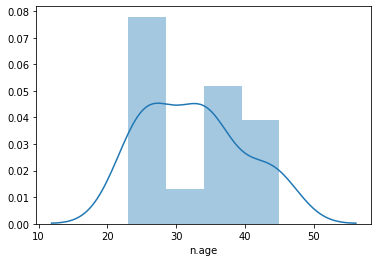

In [ ]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [ ]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

,index,n.gender
0,male,0.785714
1,female,0.214286


In [ ]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

,index,n.category
0,senior,0.428571
1,semi-senior,0.357143
2,junior,0.214286


Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [ ]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [ ]:
display(resultante.head())

,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [ ]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]

,n.category,name_node_a_y,name_node_b
8,junior,Marcela,Developer
9,junior,Marcela,windows
10,junior,Marcela,Linux
11,junior,Marcela,MySQL
12,junior,Marcela,phyton
...,...,...,...
118,senior,Martin,Data Scientist
119,senior,Martin,Vertica
120,senior,Martin,SQL Server
121,senior,Martin,phyton


# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales


# Introducción al aprendizaje automático

Lo primero que tenemos que entender es la jerarquía de los datos organizados en grafos de acuerdo a lo que necesitemos.
En este caso:
* Skills: nodo tipo skill
* Personas: not tipo person
* Tecnologias: nodo tipo knowledge

Con estas vinculaciones trataremos de responder a la pregunta de la relación entre el conocimiento que poseen las personas y sus años de experiencia.


In [ ]:
# Repetimos aquí la carga de los archivos
import pandas as pd
import numpy as np

#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


In [ ]:
nodos['n.type'].unique()

array(['team', 'person', nan, 'technologies', 'skill', 'info'],
      dtype=object)

Trabajemos solo con los nodos Skills, Person y Technologies


In [ ]:
#Definimos un dataset de skill
skills = nodos[nodos["n.type"] == "skill"]

# Mejoramos los nombres de las columnas
skills.columns = skills.columns.str.replace('n.id', 'skill_id')
skills.columns = skills.columns.str.replace('name_node_a', 'skill_name')
skills.columns = skills.columns.str.replace('n.type', 'skill_type')
# Extractamos solo las columnas necesarias
skills = skills[['skill_id','skill_name','skill_type']]
skills

,skill_id,skill_name,skill_type
71,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill
72,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill
73,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill
74,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill
75,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill
76,a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...,Data Engineer,skill


In [ ]:
#Definimos un dataset de personas
persons = nodos[nodos["n.type"] == "person"]
# persons['n.id']
#Mejoramos los nombres
persons.columns = persons.columns.str.replace('n.id', 'person_id')
persons.columns = persons.columns.str.replace('name_node_a', 'person_name')
persons.columns = persons.columns.str.replace('n.type', 'person_type')
persons.columns = persons.columns.str.replace('n.category', 'person_category')
persons.columns = persons.columns.str.replace('n.gender', 'person_gender')
persons.columns = persons.columns.str.replace('n.age', 'person_age')
persons.columns = persons.columns.str.replace('n.experience', 'person_experience')

persons.set_index('person_id')
persons

,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
5,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
6,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0
7,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0
8,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,person,semi-senior,female,34.0,4.0
9,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
18,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
19,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0


In [ ]:
#Definimos un dataset de tecnologias
technologies = nodos[nodos["n.type"] == "technologies"]
#Mejoramos los nombres
technologies.columns = technologies.columns.str.replace('n.id', 'technology_id')
technologies.columns = technologies.columns.str.replace('name_node_a', 'technology_name')
technologies.columns = technologies.columns.str.replace('n.type', 'technology_type')
technologies = technologies.drop(columns='n.category',axis=1)
technologies = technologies.drop(columns='n.gender',axis=1)
technologies = technologies.drop(columns='n.age',axis=1)
technologies = technologies.drop(columns='n.experience',axis=1)
technologies

,technology_id,technology_name,technology_type
11,ff64319904f4832ee19df96250276033-c81e728d9d4c2...,Inst DB,technologies
12,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
13,31985bb925fa449ee8d01350cb2f008d-a87ff679a2f3e...,AWS Kinesis,technologies
14,e75155594a0fd8405cde512bd9aaedad-a87ff679a2f3e...,DynamoDB,technologies
15,c75df195acce9063a96459de85bc72b9-a87ff679a2f3e...,Monta un Cluster Hadoop Big Data desde Cero,technologies
...,...,...,...
87,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies
88,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies
89,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,technologies
90,de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...,ODI,technologies


In [ ]:
#vamos a unir los dataset para analizarlos 
resultante = skills.merge(relaciones, left_on='skill_id', right_on='id_node_b')
resultante = resultante[['skill_id','skill_name','skill_type','id_node_a']]
resultante.set_index('id_node_a')
resultante



,skill_id,skill_name,skill_type,id_node_a
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...
3,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...
4,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...
5,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...
6,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...
7,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...
8,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...
9,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...


In [ ]:
# Vamos a vincular con las personas
resultante = resultante.merge(persons, left_on='id_node_a', right_on='person_id')
resultante.merge(persons, left_on='id_node_a', right_on='person_id')


,skill_id,skill_name,skill_type,id_node_a,person_id_x,person_name_x,person_type_x,person_category_x,person_gender_x,person_age_x,person_experience_x,person_id_y,person_name_y,person_type_y,person_category_y,person_gender_y,person_age_y,person_experience_y
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0
2,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
3,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
4,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0
5,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0
6,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
7,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
8,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
9,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0


In [ ]:

# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante 

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0
2,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
3,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
4,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0
5,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0
6,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
7,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
8,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
9,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0


In [ ]:
# Vamos a vincular con las relaciones de las tecnologias
resultante = resultante.merge(relaciones[['id_node_a','id_node_b']], left_on='person_id', right_on='id_node_a')
relaciones["name_node_a"].unique()
resultante = resultante.merge(technologies, left_on='id_node_b', right_on='technology_id')
resultante

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,id_node_a,id_node_b,technology_id,technology_name,technology_type
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
1,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
4,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,unix,technologies
88,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,S3,technologies
89,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,EC2,technologies
90,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies


In [ ]:
# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante = resultante.drop(columns='id_node_b',axis=1)
resultante 

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
1,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
4,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,unix,technologies
88,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,S3,technologies
89,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,EC2,technologies
90,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies


In [ ]:
# Calculamos la cantidad de tecnologias conocidas por cada persona y la almacenamos en el dataset de trabajo
dataset1 = resultante.groupby(['skill_name','person_gender', 'person_category','person_name','person_age','person_experience']).size().to_frame(name='Knowledge').reset_index()
dataset1



,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,male,semi-senior,Gastón,27.0,3.0,3
1,DBA,male,senior,Jonatan,33.0,7.0,6
2,DBA,male,senior,Lucas,35.0,6.0,4
3,DBA,male,senior,Marcelo,41.0,12.0,7
4,Data Scientist,male,semi-senior,Fernando,28.0,4.0,9
5,Data Scientist,male,senior,Martin,34.0,5.0,4
6,Developer,female,junior,Marcela,23.0,3.0,5
7,Developer,female,semi-senior,Andrea,27.0,3.0,11
8,Developer,female,semi-senior,Luciana,34.0,4.0,4
9,Developer,male,junior,Matias,25.0,2.0,4


In [ ]:
#Usaremos este dataset para avanzar con los aspectos de Aprendizaje Automático
dataset1

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,male,semi-senior,Gastón,27.0,3.0,3
1,DBA,male,senior,Jonatan,33.0,7.0,6
2,DBA,male,senior,Lucas,35.0,6.0,4
3,DBA,male,senior,Marcelo,41.0,12.0,7
4,Data Scientist,male,semi-senior,Fernando,28.0,4.0,9
5,Data Scientist,male,senior,Martin,34.0,5.0,4
6,Developer,female,junior,Marcela,23.0,3.0,5
7,Developer,female,semi-senior,Andrea,27.0,3.0,11
8,Developer,female,semi-senior,Luciana,34.0,4.0,4
9,Developer,male,junior,Matias,25.0,2.0,4


In [ ]:
#Listamos las tecnologías para crear columnas adicionales
newColumns = resultante['technology_name'].unique()
newColumns

array(['AWS Lambda', 'phyton', 'Docker', 'Kubernetes', 'Linux', 'Spark',
       'MySQL', 'SQL Server', 'R', 'Vertica', 'ODI', 'windows',
       'Golden Gate', 'Oracle', 'Oracle Cloud', 'SQL', 'java', 'pentaho',
       'Hadoop', 'MariaDB', 'Redis', 'Azure', 'Google cloud',
       'PostgreSQL', 'unix', 'S3', 'EC2', 'talend', 'neo4j'], dtype=object)

In [ ]:
#Creamos un dataframe con los nombres de las nuevas columnas
dataTechnologies = pd.DataFrame(resultante,
 columns=newColumns, index=resultante['skill_id'])
dataTechnologies

,AWS Lambda,phyton,Docker,Kubernetes,Linux,Spark,MySQL,SQL Server,R,Vertica,ODI,windows,Golden Gate,Oracle,Oracle Cloud,SQL,java,pentaho,Hadoop,MariaDB,Redis,Azure,Google cloud,PostgreSQL,unix,S3,EC2,talend,neo4j
skill_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Creamos un dataset para indicar las tecnologias
dataset2 = resultante.merge(dataTechnologies, left_on='skill_id', right_on='skill_id')
dataset2

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type,AWS Lambda,phyton,Docker,Kubernetes,Linux,Spark,MySQL,SQL Server,R,Vertica,ODI,windows,Golden Gate,Oracle,Oracle Cloud,SQL,java,pentaho,Hadoop,MariaDB,Redis,Azure,Google cloud,PostgreSQL,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2318,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2319,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,Gastón,person,semi-senior,male,27.0,3.0,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Eliminamos los duplicados 
dataset2 = dataset2.drop_duplicates()
dataset2
  

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type,AWS Lambda,phyton,Docker,Kubernetes,Linux,Spark,MySQL,SQL Server,R,Vertica,ODI,windows,Golden Gate,Oracle,Oracle Cloud,SQL,java,pentaho,Hadoop,MariaDB,Redis,Azure,Google cloud,PostgreSQL,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,4631193902bfaa235973c349bce7a3a7-a87ff679a2f3e...,Kubernetes,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0,7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...,Oracle,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2242,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0,13858423f507c2e000f9928b1c241ee2-a87ff679a2f3e...,Oracle Cloud,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,7c180a87acb6847b9b584671fc5e30e5-a87ff679a2f3e...,SQL,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2282,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verficamos los conocimientos de una persona
dataset2[dataset2['person_name']=='Matias']


,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type,AWS Lambda,phyton,Docker,Kubernetes,Linux,Spark,MySQL,SQL Server,R,Vertica,ODI,windows,Golden Gate,Oracle,Oracle Cloud,SQL,java,pentaho,Hadoop,MariaDB,Redis,Azure,Google cloud,PostgreSQL,unix,S3,EC2,talend,neo4j
361,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,MySQL,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Dataset
Trabajar con el dataset1 (donde el conocimiento está resumido en la columna knowlegde) y dataset2 (donde el conocimiento está armado como columnas individuales) para analizar posibles resultados


In [20]:
dataset1

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,male,semi-senior,Gastón,27.0,3.0,3
1,DBA,male,senior,Jonatan,33.0,7.0,6
2,DBA,male,senior,Lucas,35.0,6.0,4
3,DBA,male,senior,Marcelo,41.0,12.0,7
4,Data Scientist,male,semi-senior,Fernando,28.0,4.0,9
5,Data Scientist,male,senior,Martin,34.0,5.0,4
6,Developer,female,junior,Marcela,23.0,3.0,5
7,Developer,female,semi-senior,Andrea,27.0,3.0,11
8,Developer,female,semi-senior,Luciana,34.0,4.0,4
9,Developer,male,junior,Matias,25.0,2.0,4


In [21]:
dataset2

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type,AWS Lambda,phyton,Docker,Kubernetes,Linux,Spark,MySQL,SQL Server,R,Vertica,ODI,windows,Golden Gate,Oracle,Oracle Cloud,SQL,java,pentaho,Hadoop,MariaDB,Redis,Azure,Google cloud,PostgreSQL,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,bbbe1fbd5a476cc46c35ea4b051c1a36-a87ff679a2f3e...,phyton,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,4631193902bfaa235973c349bce7a3a7-a87ff679a2f3e...,Kubernetes,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0,7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...,Oracle,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2242,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0,13858423f507c2e000f9928b1c241ee2-a87ff679a2f3e...,Oracle Cloud,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,7c180a87acb6847b9b584671fc5e30e5-a87ff679a2f3e...,SQL,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2282,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

# Dataset para Problema de Clasificación Binario
Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

### Mezca Aleatória y División en Train/Test
Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.